## Flight Delay Prediction

### About the Dataset

https://www.kaggle.com/datasets/rowhitswami/feb-2020-us-flight-delay/discussion?resource=download

The dataset is been taken from kaggle.This Dataset is of US feb 2020 flight Delay.

This Dataset includes following coloumns.

1. MONTH:The month in which the flight was scheduled is listed in this column. for this particular dataset the month is february only.

2. DAY_OF_MONTH:This column is listed with the values between 1 and 30. The day of month in which the flight is scheduled.

3. DAY_OF_WEEK:This column is listed with the values between 1 and 6. The day of week in which the flight is scheduled.

4. OP_UNIQUE_CARRIER: The flight carrier 

5. ORIGIN: From which City the flight is started.

6. DEST: The city of arrival of a flight.

7. DEP_TIME: Departure time of a flight.

8. DEP_DEL15: Departure delay of flight which is max 15 mins.

9. DISTANCE: Distance covered by the flight.


## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('feb-20-us-flight-delay.csv') 

In [3]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DISTANCE,Unnamed: 9
0,2,1,6,MQ,CLT,LYH,1430.0,0.0,175.0,NaN
1,2,8,6,MQ,CLT,LYH,1442.0,0.0,175.0,NaN
2,2,13,4,MQ,DFW,SHV,2247.0,0.0,190.0,NaN
3,2,14,5,MQ,DFW,SHV,2230.0,0.0,190.0,NaN
4,2,15,6,MQ,DFW,SHV,2246.0,0.0,190.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574268 entries, 0 to 574267
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MONTH              574268 non-null  int64  
 1   DAY_OF_MONTH       574268 non-null  int64  
 2   DAY_OF_WEEK        574268 non-null  int64  
 3   OP_UNIQUE_CARRIER  574268 non-null  object 
 4   ORIGIN             574268 non-null  object 
 5   DEST               574268 non-null  object 
 6   DEP_TIME           569330 non-null  float64
 7   DEP_DEL15          569317 non-null  float64
 8   DISTANCE           574268 non-null  float64
 9   Unnamed: 9         0 non-null       float64
dtypes: float64(4), int64(3), object(3)
memory usage: 43.8+ MB


In [5]:
df.isna().sum()

MONTH                     0
DAY_OF_MONTH              0
DAY_OF_WEEK               0
OP_UNIQUE_CARRIER         0
ORIGIN                    0
DEST                      0
DEP_TIME               4938
DEP_DEL15              4951
DISTANCE                  0
Unnamed: 9           574268
dtype: int64

<AxesSubplot:>

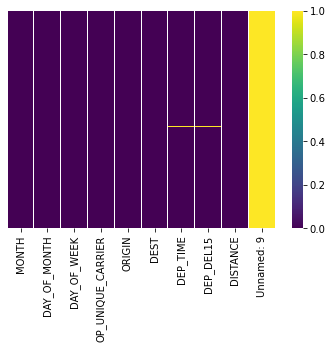

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [7]:
del df['Unnamed: 9']

In [8]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DISTANCE
0,2,1,6,MQ,CLT,LYH,1430.0,0.0,175.0
1,2,8,6,MQ,CLT,LYH,1442.0,0.0,175.0
2,2,13,4,MQ,DFW,SHV,2247.0,0.0,190.0
3,2,14,5,MQ,DFW,SHV,2230.0,0.0,190.0
4,2,15,6,MQ,DFW,SHV,2246.0,0.0,190.0


In [9]:
(df.count()[0] - df['DEP_TIME'].count()) * 100/ df.count()[0]

0.8598772698461346

In [10]:
df['DEP_TIME'].mode()

0    555.0
dtype: float64

#### The count of Null values is actually less than a percent of the dataset so in this particular case, I'm dropping them otherwise if the proportion would've been more than around 7% or so, I would've imputed the missing values with the mode value of that feature as shown above.

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
ORIGIN               0
DEST                 0
DEP_TIME             0
DEP_DEL15            0
DISTANCE             0
dtype: int64

In [13]:
df['DEP_DEL15'].value_counts()

0.0    487135
1.0     82182
Name: DEP_DEL15, dtype: int64

### Exploratory Data Analysis

<AxesSubplot:xlabel='DEP_DEL15', ylabel='count'>

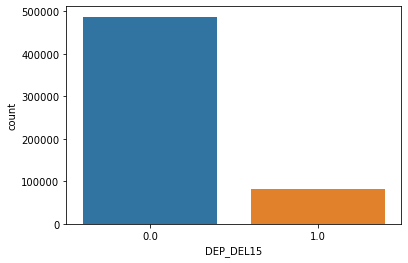

In [14]:
sns.countplot(x='DEP_DEL15', data =df)

Most flight delays were for less than 15 mins

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='count'>

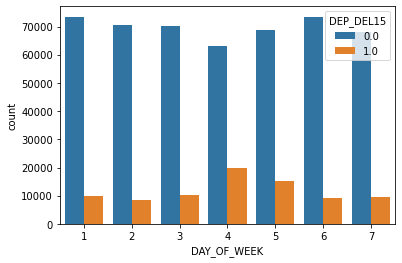

In [15]:
sns.countplot(x='DAY_OF_WEEK', hue="DEP_DEL15",data=df)

Most flight delays were on the fourth day of the week and least were on the 2nd day 

<AxesSubplot:xlabel='OP_UNIQUE_CARRIER', ylabel='count'>

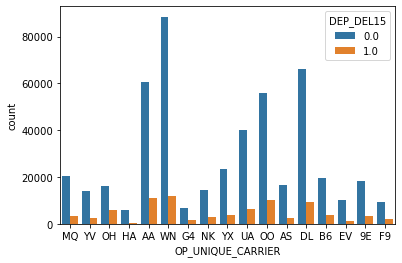

In [16]:
sns.countplot(x='OP_UNIQUE_CARRIER', hue='DEP_DEL15', data=df)

Most flight delays were caused by the carriers WN and AA

Calculating Unique values

In [17]:
df.nunique()

MONTH                   1
DAY_OF_MONTH           29
DAY_OF_WEEK             7
OP_UNIQUE_CARRIER      17
ORIGIN                350
DEST                  350
DEP_TIME             1428
DEP_DEL15               2
DISTANCE             1443
dtype: int64

### Performing One Hot Encoding !!

In [18]:
df.shape

(569317, 9)

In [19]:
df['OP_UNIQUE_CARRIER'].unique()

array(['MQ', 'YV', 'OH', 'HA', 'AA', 'WN', 'G4', 'NK', 'YX', 'UA', 'OO',
       'AS', 'DL', 'B6', 'EV', '9E', 'F9'], dtype=object)

In [20]:
data = pd.get_dummies(df,drop_first=True)

In [21]:
new_df = data[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_TIME','DEP_DEL15',
       'DISTANCE','OP_UNIQUE_CARRIER_MQ','OP_UNIQUE_CARRIER_YV', 'OP_UNIQUE_CARRIER_OH',
        'OP_UNIQUE_CARRIER_HA', 'OP_UNIQUE_CARRIER_AA', 'OP_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_G4','OP_UNIQUE_CARRIER_NK', 'OP_UNIQUE_CARRIER_YX', 'OP_UNIQUE_CARRIER_UA', 'OP_UNIQUE_CARRIER_OO',
       'OP_UNIQUE_CARRIER_AS', 'OP_UNIQUE_CARRIER_DL', 'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_EV',
         'OP_UNIQUE_CARRIER_F9','ORIGIN_ATL','ORIGIN_ORD','ORIGIN_DFW','ORIGIN_DEN',
         'ORIGIN_CLT','ORIGIN_LAX','ORIGIN_PHX','ORIGIN_IAH','DEST_ATL','DEST_ORD','DEST_DFW','DEST_DEN',
         'DEST_CLT','DEST_LAX','DEST_PHX','DEST_IAH']]

## Building the Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [23]:
model=RandomForestClassifier(n_estimators=100)

In [24]:
X=(new_df.drop('DEP_DEL15',axis=1))
y= new_df['DEP_DEL15']

In [25]:
X

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DISTANCE,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_YV,OP_UNIQUE_CARRIER_OH,OP_UNIQUE_CARRIER_HA,OP_UNIQUE_CARRIER_AA,...,ORIGIN_PHX,ORIGIN_IAH,DEST_ATL,DEST_ORD,DEST_DFW,DEST_DEN,DEST_CLT,DEST_LAX,DEST_PHX,DEST_IAH
0,2,1,6,1430.0,175.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,8,6,1442.0,175.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,13,4,2247.0,190.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,14,5,2230.0,190.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,15,6,2246.0,190.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574263,2,27,4,2226.0,444.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
574264,2,27,4,737.0,577.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
574265,2,27,4,1026.0,577.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
574266,2,27,4,1008.0,907.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [26]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
574263    0.0
574264    0.0
574265    0.0
574266    0.0
574267    0.0
Name: DEP_DEL15, Length: 569317, dtype: float64

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [28]:
X_train

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DISTANCE,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_YV,OP_UNIQUE_CARRIER_OH,OP_UNIQUE_CARRIER_HA,OP_UNIQUE_CARRIER_AA,...,ORIGIN_PHX,ORIGIN_IAH,DEST_ATL,DEST_ORD,DEST_DFW,DEST_DEN,DEST_CLT,DEST_LAX,DEST_PHX,DEST_IAH
54244,2,24,1,1856.0,833.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
256362,2,22,6,458.0,639.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
153314,2,18,2,2327.0,1062.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
475238,2,7,5,1422.0,1235.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421176,2,8,6,1757.0,594.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508538,2,24,1,2045.0,300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62179,2,4,2,1302.0,623.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120120,2,18,2,705.0,605.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432545,2,20,4,649.0,184.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_test

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DISTANCE,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_YV,OP_UNIQUE_CARRIER_OH,OP_UNIQUE_CARRIER_HA,OP_UNIQUE_CARRIER_AA,...,ORIGIN_PHX,ORIGIN_IAH,DEST_ATL,DEST_ORD,DEST_DFW,DEST_DEN,DEST_CLT,DEST_LAX,DEST_PHX,DEST_IAH
418725,2,7,5,1247.0,1947.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
144623,2,8,6,718.0,1041.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261111,2,18,2,1534.0,748.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
454130,2,27,4,841.0,100.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
70742,2,23,7,2248.0,587.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115920,2,16,7,1602.0,150.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565311,2,5,3,931.0,1156.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
762,2,17,1,553.0,868.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
359752,2,16,7,1123.0,1381.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y_train

54244     0.0
256362    0.0
153314    1.0
475238    1.0
421176    0.0
         ... 
508538    0.0
62179     0.0
120120    0.0
432545    0.0
215819    0.0
Name: DEP_DEL15, Length: 426987, dtype: float64

In [31]:
y_test

418725    1.0
144623    0.0
261111    0.0
454130    0.0
70742     0.0
         ... 
115920    1.0
565311    0.0
762       0.0
359752    0.0
158652    0.0
Name: DEP_DEL15, Length: 142330, dtype: float64

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
predictions = model.predict(X_test)

In [35]:
predictions

array([1., 0., 0., ..., 0., 0., 0.])

In [36]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[118220   3612]
 [ 15375   5123]]


              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93    121832
         1.0       0.59      0.25      0.35     20498

    accuracy                           0.87    142330
   macro avg       0.74      0.61      0.64    142330
weighted avg       0.84      0.87      0.84    142330



#### The above is the confusion matrix for Random Forest Classifier algorithm. The Accuracy of this model using Random Forest Classifier is 0.87

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
deci_class = DecisionTreeClassifier()

In [39]:
deci_class.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
preds_deci_class = deci_class.predict(X_test)

In [41]:
print(confusion_matrix(y_test,preds_deci_class))
print('\n')
print(classification_report(y_test,preds_deci_class))

[[109044  12788]
 [ 12835   7663]]


              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89    121832
         1.0       0.37      0.37      0.37     20498

    accuracy                           0.82    142330
   macro avg       0.63      0.63      0.63    142330
weighted avg       0.82      0.82      0.82    142330



#### The above is the confusion matrix for Decision Tree Classifier algorithm. The Accuracy of this model using Decision Tree Classifier is 0.82

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logi = LogisticRegression()

In [44]:
logi.fit(X_train,y_train)

C:\Users\Sakshi Joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
logi_preds = logi.predict(X_test)

In [46]:
print(confusion_matrix(y_test,logi_preds))
print('\n')
print(classification_report(y_test,logi_preds))

[[121825      7]
 [ 20481     17]]


              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92    121832
         1.0       0.71      0.00      0.00     20498

    accuracy                           0.86    142330
   macro avg       0.78      0.50      0.46    142330
weighted avg       0.83      0.86      0.79    142330



#### The above is the confusion matrix for Logistic Regression algorithm. The Accuracy of this model using Logistic Regression is 0.86


### Conclusion:

Hence, by comparing the accuracy of this algorithm we can say that Random Forest Classifier gives us the best predictions.

Note: This predictions can be used be for predicting the flight delays in february of the next year. 